In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from will import detect

In [18]:
# Define directories for the data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_simple_bursts"

# Lists to store lightcurves
lightcurves_scattered = []
lightcurves_simple = []
SNRS_scattered = []
SNRS_simple = []

# Loop through files in the scattered burst directory
for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(data_dir_scattered, filename))

        # Calculate the lightcurve
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

        # Append the lightcurve to the list
        lightcurves_scattered.append(lightcurve)

        # Append Peak SNR to list
        SNRS_scattered.append(np.max(lightcurve))

# Loop through files in the simple burst directory
for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(data_dir_simple, filename))

        # Calculate the lightcurve
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

        # Append the lightcurve to the list
        lightcurves_simple.append(lightcurve)

        # Append Peak SNR to list
        SNRS_simple.append(np.max(lightcurve))

# Convert the lists to flat arrays
lightcurves_scattered = np.array(lightcurves_scattered)[0:100]
lightcurves_simple = np.array(lightcurves_simple)[0:100]


In [19]:
# Combine the two datasets into one
combined_data = np.concatenate((lightcurves_scattered, lightcurves_simple), axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024)

combined_data_2d.shape

(200, 1024)

In [20]:
# Apply PCA to the combined data
n_components = 2  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)

In [21]:
pca1 = pca.transform(lightcurves_scattered)
pca2 = pca.transform(lightcurves_simple)

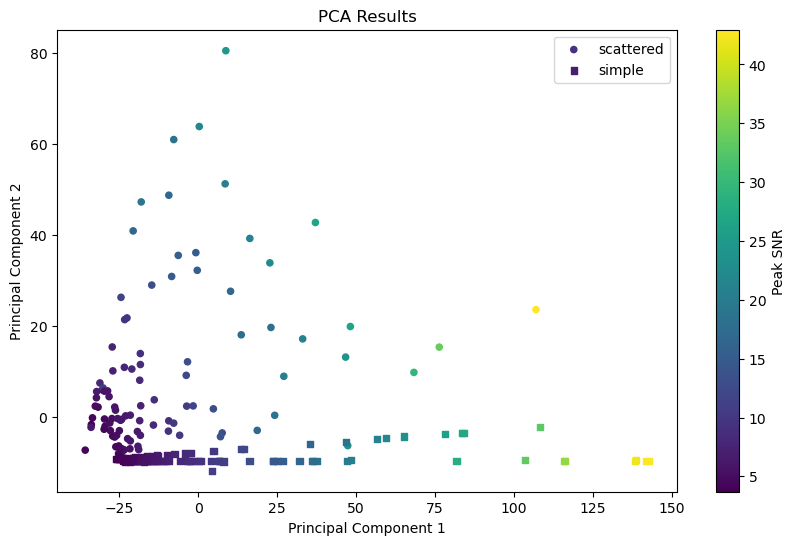

In [23]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a scatter plot where points are colored by scattering times
scatter =plt.scatter(pca1[:, 0], pca1[:, 1], c=SNRS_scattered[0:100], cmap='viridis', label='scattered', marker='o', s=20)
plt.scatter(pca2[:, 0], pca2[:, 1], c=SNRS_simple[0:100], cmap='viridis', label='simple', marker='s', s=20)

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set a title for the plot
plt.title('PCA Results')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Peak SNR')

# Display a legend to differentiate the two datasets
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Apply PCA to the combined data
n_components = 3  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)

pca1 = pca.transform(lightcurves_scattered)
pca2 = pca.transform(lightcurves_simple)

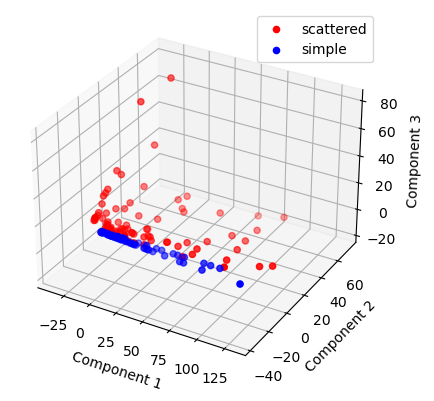

In [8]:
# PCA results pca1 and pca2 with three components each
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for pca1
ax.scatter(pca1[:, 0], pca1[:, 1], pca1[:, 2], c='r', label='scattered')

# Scatter plot for pca2
ax.scatter(pca2[:, 0], pca2[:, 1], pca2[:, 2], c='b', label='simple')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend()
plt.show()

## Look at explained variance as a function of the number of components

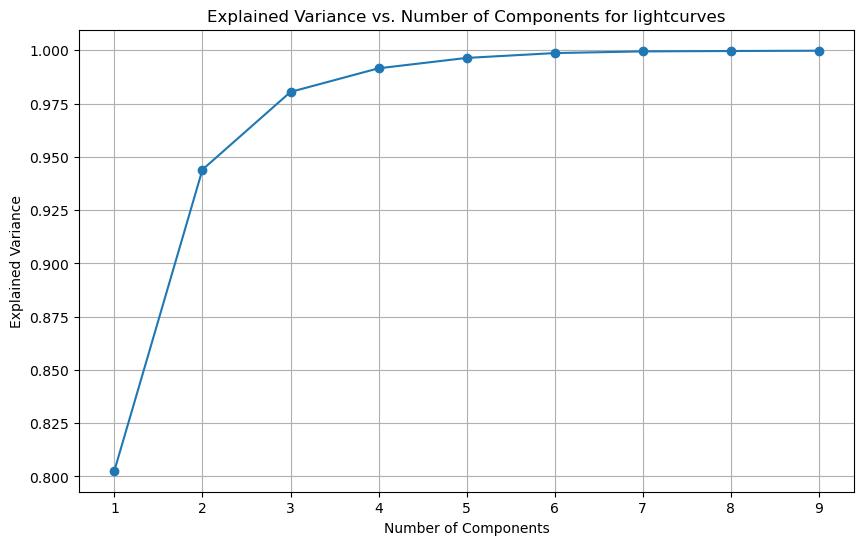

In [26]:
explained_variance = []

for n in range(1, 10):
    pca = PCA(n_components=n)
    pca.fit(combined_data_2d)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance as a function of the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components for lightcurves')
plt.grid(True)
plt.show()